# Labo 6 - python voor data science
Het doel van dit labo is dat je kan:
 - filteren met meerdere condities.
 - kolommen toevoegen, verwijderen en bewerken.
 - zelf in de documentatie eenvoudige functies leren gebruiken. 
 - kijken of de data normaalverdeeld is.
 - uitschieters opsporen en verwijderen uit een dataset.
 
Gegeven is het bestand 'movies.csv' die de IMDB 5000 dataset bevat. Deze dataset bevat gegevens (afkomstig van imdb.com) over meer dan 5000 films.
Gebruik Python met bijhorende libraries om de onderstaande vragen uit te werken en te beantwoorden.



Een beschrijving van de verschillende variabelen kan je hieronder vinden:

| Variable Name |Description |
| --- | --- | 
|movie_title 	|Title of the Movie |
| duration |	Duration in minutes |
|director_name |	Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name 	|Other actor starring in the movie|
|actor_2_facebook_likes |	Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users 	|Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color 	|Film colorization. ‘Black and White’ or ‘Color’|
|title_year 	| The year in which the movie is released (1916:2016)
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [2]:
# Importeren van de dataset
df = pd.read_csv('movies.csv',sep=',')

In [3]:
# Toon de eerste 10 rijen
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,Action
6,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,Adventure
7,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,Action
8,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,Adventure
9,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,Action


Hoeveel films steken in de dataset?

In [4]:
df['color'].count()

3770

Hoeveel kolommen zijn er in de dataset?

In [5]:
len(df.columns)

26

Wat zijn deze kolommen?

In [6]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'genres'],
      dtype='object')

Gebruik de describe-functie om een overzicht te bekomen van de variabelen in de dataset. Bevat de dataset ontbrekende waarden of waarden die onrealistisch lijken? 

In [7]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3.770000e+03,3.770000e+03,3770.000000,3770.000000,3770.000000,3.770000e+03,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,166.846419,110.221485,804.459682,769.151989,7724.785411,5.242427e+07,1.054415e+05,11489.983024,1.376393,335.670292,4.608673e+07,2003.009549,2015.390716,6.463873,2.111202,9330.752785
std,123.537036,22.631720,3062.831521,1891.113599,15496.630039,7.025551e+07,1.518841e+05,19096.558629,2.040899,410.916203,2.256040e+08,9.887261,4537.712194,1.057305,0.352764,21431.059266
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,192.250000,744.250000,8.083416e+06,1.937225e+04,1906.000000,0.000000,109.000000,1.000000e+07,1999.000000,382.000000,5.900000,1.850000,0.000000
50%,138.000000,106.000000,63.000000,434.500000,1000.000000,3.001317e+07,5.355750e+04,4041.000000,1.000000,209.000000,2.500000e+07,2005.000000,683.000000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.672026e+07,1.282162e+05,16228.750000,2.000000,398.000000,5.000000e+07,2010.000000,975.750000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


Toon van alle kolommen hun datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3770 non-null   object 
 1   director_name              3770 non-null   object 
 2   num_critic_for_reviews     3770 non-null   float64
 3   duration                   3770 non-null   float64
 4   director_facebook_likes    3770 non-null   float64
 5   actor_3_facebook_likes     3770 non-null   float64
 6   actor_2_name               3770 non-null   object 
 7   actor_1_facebook_likes     3770 non-null   float64
 8   gross                      3770 non-null   float64
 9   actor_1_name               3770 non-null   object 
 10  movie_title                3770 non-null   object 
 11  num_voted_users            3770 non-null   int64  
 12  cast_total_facebook_likes  3770 non-null   int64  
 13  actor_3_name               3770 non-null   objec

Hoeveel van de films zijn in kleur? Stel dit visueel voor aan de hand van een gepaste plot.

In [9]:
df[df['color']=='Color']['color'].count()

3646

Hoeveel verschillende genres zijn er aanwezig in de dataset?

In [10]:
df['genres'].value_counts().count()

17

Visualiseer het aantal films per genre. Extra: lukt het jou om ze te sorteren van hoog naar laag?

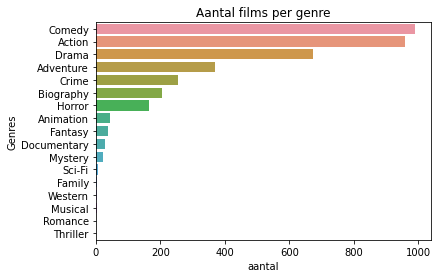

In [11]:
g=df['genres'].value_counts()
g = g.to_dict()
key = list(g.keys())
value = list(g.values())
sns.barplot(x=value, y=key)
plt.title('Aantal films per genre')
plt.xlabel('aantal')
plt.ylabel('Genres')
plt.show()

Wat is de hoogste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [12]:
df[df['imdb_score'] == df['imdb_score'].max()]


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
1800,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,0.0,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000,Crime


Wat is de laagste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [13]:
df[df['imdb_score'] == df['imdb_score'].min()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
2546,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Usher Raymond,Justin Bieber: Never Say Never,74351,714,Boys II Men,1.0,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000,Documentary


Welke is de langste film en welke is de kortste film?

In [14]:
# langste
df[df['duration'] == df['duration'].max()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
1414,Color,Taylor Hackford,12.0,330.0,138.0,672.0,Jesse Borrego,848.0,4496583.0,Delroy Lindo,"Blood In, Blood Out",23181,3227,Raymond Cruz,2.0,129.0,English,USA,R,35000000.0,1993.0,674.0,8.0,1.66,6000,Crime


In [15]:
# kortste
df[df['duration'] == df['duration'].min()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
3343,Color,Sam Raimi,252.0,37.0,0.0,199.0,Dan Hicks,634.0,5923044.0,Ted Raimi,Evil Dead II,113451,1347,Kassie Wesley DePaiva,0.0,537.0,English,USA,X,3600000.0,1987.0,328.0,7.8,1.85,0,Comedy


Hoeveel films hebben een PG13-rating en hebben een imdb score hoger dan 8.5?

In [16]:
df[(df['imdb_score']>8.5)&(df['content_rating']=='PG-13')]['color'].count()

7

Hoeveel franstalige films zijn komedies?

In [17]:
df[(df['genres']=='Comedy')&(df['language']=='French')]['color'].count()

12

Wat is de maximale imdb score van een franstalige drama film? En hoelang duurde deze film?

In [18]:
x = df[(df['language']=='French')&(df['genres']=='Drama')]['imdb_score'].max()
df[(df['language']=='French')&(df['genres']=='Drama')&(df['imdb_score']==x)]
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,Drama
3766,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,Drama
3767,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,Drama
3768,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,Action


Verander de index van de dataframe van een getal naar de titel van de film. De documentatie van de te gebruiken functie kun je hier terug vinden: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [19]:
df = df.set_index('movie_title')
df

#als we dit vast doen dan kunnen we later onze histrogrm niet maken omdat er dubbele titels inzitten

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,Drama
3766,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,Drama
3767,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,Drama
3768,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,Action


Sorteer van hoge omzet naar lage omzet (gross variabele). Gebruik hiervoor de sort_values functie.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
Toon de top 10

In [20]:
df['gross'].sort_values()[-10:]

3       448130642.0
7       458991599.0
2707    460935665.0
231     474544677.0
64      533316061.0
16      623279547.0
755     623279547.0
28      652177271.0
25      658672302.0
0       760505847.0
Name: gross, dtype: float64

Maak een histogram van het aantal films volgens de imdb score. Bereken hiervoor zelf de klassenbreedte en bepaal zelf de bins

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

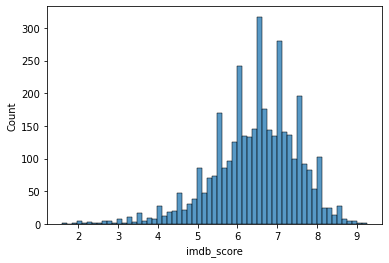

In [21]:
def get_bins(df,kolom):
    rang = df[kolom].max()-df[kolom].min()
    bins = (rang/(np.sqrt(df[kolom].count())))
    bins = np.arange(df[kolom].min(), df[kolom].max(), bins)
    return bins

bins = get_bins(df,'imdb_score')
sns.histplot(data=df,x='imdb_score',bins=bins)

Het aantal facebook likes blijkt voor de klant toch niet relevant te zijn, verwijder alle kolommen waar facebook_likes in voorkomt.

In [22]:
df =   df.drop('director_facebook_likes', axis=1)

Momenteel staan de opbrengst (gross) en het budget nog in dollars, maar de klant zou dit graag in euro's weergeven willen zien. Bewerk de kolommen naar het gevraagde format (voeg niet een nieuwe kolom toe, maar bewerk rechtsreeks de kolom) (1 amerikaanse dollar = 0.86 euro)

In [23]:
df['gross'] = df['gross']*0.86
df

,color,director_name,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
0,Color,James Cameron,723.0,178.0,855.0,Joel David Moore,1000.0,6.540350e+08,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
1,Color,Gore Verbinski,302.0,169.0,1000.0,Orlando Bloom,40000.0,2.660876e+08,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
2,Color,Sam Mendes,602.0,148.0,161.0,Rory Kinnear,11000.0,1.720638e+08,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
3,Color,Christopher Nolan,813.0,164.0,23000.0,Christian Bale,27000.0,3.853924e+08,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
4,Color,Andrew Stanton,462.0,132.0,530.0,Samantha Morton,640.0,6.283046e+07,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,Color,Olivier Assayas,81.0,110.0,45.0,Béatrice Dalle,576.0,1.169660e+05,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,Drama
3766,Color,Jafar Panahi,64.0,90.0,0.0,Nargess Mamizadeh,5.0,5.794508e+05,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,Drama
3767,Color,Shane Carruth,143.0,77.0,8.0,David Sullivan,291.0,3.652936e+05,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,Drama
3768,Color,Robert Rodriguez,56.0,81.0,6.0,Peter Marquardt,121.0,1.755191e+06,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,Action


De hoeveelheid winst (of verlies) van een film is niet in de dataset te vinden maar valt eenvoudig te berekenen door van de opbrengst de kosten af te trekken. Met andere woorden: $gross-budget$. Deze berekende winst voegen we toe aan onze dataset als volgt: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

In [24]:
df.insert(24,'Winst', df['gross']-df['budget'])
df

,color,director_name,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Winst,genres
0,Color,James Cameron,723.0,178.0,855.0,Joel David Moore,1000.0,6.540350e+08,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4.170350e+08,Action
1,Color,Gore Verbinski,302.0,169.0,1000.0,Orlando Bloom,40000.0,2.660876e+08,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-3.391243e+07,Action
2,Color,Sam Mendes,602.0,148.0,161.0,Rory Kinnear,11000.0,1.720638e+08,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-7.293621e+07,Action
3,Color,Christopher Nolan,813.0,164.0,23000.0,Christian Bale,27000.0,3.853924e+08,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1.353924e+08,Action
4,Color,Andrew Stanton,462.0,132.0,530.0,Samantha Morton,640.0,6.283046e+07,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-2.008695e+08,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,Color,Olivier Assayas,81.0,110.0,45.0,Béatrice Dalle,576.0,1.169660e+05,Maggie Cheung,Clean,3924,776,Don McKellar,1.0,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171,1.124660e+05,Drama
3766,Color,Jafar Panahi,64.0,90.0,0.0,Nargess Mamizadeh,5.0,5.794508e+05,Fereshteh Sadre Orafaiy,The Circle,4555,5,Mojgan Faramarzi,0.0,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,5.694508e+05,Drama
3767,Color,Shane Carruth,143.0,77.0,8.0,David Sullivan,291.0,3.652936e+05,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,3.582936e+05,Drama
3768,Color,Robert Rodriguez,56.0,81.0,6.0,Peter Marquardt,121.0,1.755191e+06,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,1.748191e+06,Action


Welke is de meest verlieslatende film en welke de meest winstgevende?

In [25]:
df[df['Winst']==df['Winst'].min()]

,color,director_name,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Winst,genres
2683,Color,Joon-ho Bong,363.0,110.0,74.0,Kang-ho Song,629.0,1893214.32,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000,-1.221361e+10,Comedy


In [26]:
df[df['Winst']==df['Winst'].max()]

,color,director_name,num_critic_for_reviews,duration,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Winst,genres
0,Color,James Cameron,723.0,178.0,855.0,Joel David Moore,1000.0,6.540350e+08,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,4.170350e+08,Action


Iemand beweert dat Sci-Fi films winstgevender zijn dan horror films. Klopt deze bewering? Gebruik de boxplot om je antwoord te staven

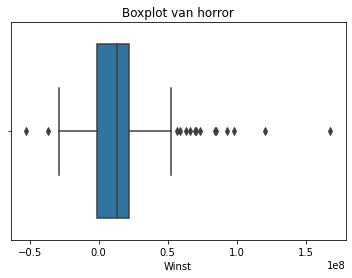

Text(0.5, 1.0, 'Boxplot van sci-fi')

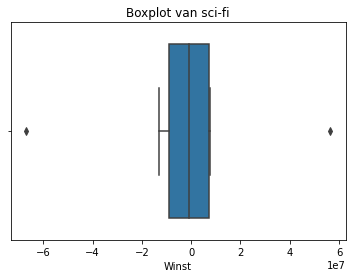

In [27]:
y = df[df['genres']=='Horror']['Winst']
sns.boxplot(x=df[df['genres']=='Horror']['Winst'])
plt.title('Boxplot van horror')
plt.show()
sns.boxplot(x=df[df['genres']=='Sci-Fi']['Winst'])
plt.title('Boxplot van sci-fi')

Is de winst normaalverdeeld?

0.9907161803713528

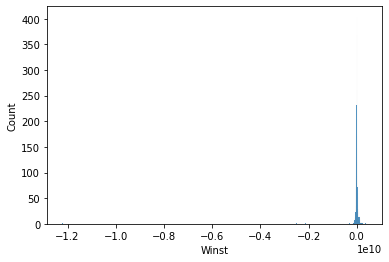

In [28]:
sns.histplot(df['Winst'])

stdev = df['Winst'].std()
avg = df['Winst'].mean()

tot = df['Winst'].count()

proc = (df[(df['Winst']>avg-stdev)&(df['Winst']<avg+stdev)]['Winst'].count())
proc/tot

Bepaal de uitschieters bij de winst. Welke film brachten een extreem grote winst met zich mee en welke een extreem groot verlies?
Bereken de uitschieters op twee mogelijke manieren:
1. Via de interkwartielafstand: uitschieters zijn waarden die groter zijn dan Q3 + 1,5 keer de interkwartielafstand of kleiner zijn dan Q1- 1,5 keer de interkwartielafstand.
2. Via de standaardafwijking: waarden die meer dan 3 standaardafwijken van het gemiddelde gelegen zijn. Dus waarden groter dan gemiddelde + 3 keer de std.afw en waarden kleiner dan het gemiddelde - 3 keer de standaardafwijking. 

In [29]:
# Uitschieters via kwartielen
iq = df['Winst'].quantile(0.75)-df['Winst'].quantile(0.25)
uitschieter_boven = df[(df['Winst']>df['Winst'].quantile(0.75)+(1.5*iq))]['Winst'].count()
print(uitschieter_boven)
uitschieter_onder = df[(df['Winst']<df['Winst'].quantile(0.25)-(1.5*iq))]['Winst'].count()
uitschieter_onder


290


130

In [30]:
# Uitschieters via standaardafwijking
uitschieter_boven = df[(df['Winst']>avg+(3*stdev))]['Winst']
print(uitschieter_boven)
uitschieter_onder = df[(df['Winst']<avg-(3*stdev))]['Winst']
uitschieter_onder

Series([], Name: Winst, dtype: float64)


2138   -2.398024e+09
2148   -2.127167e+09
2683   -1.221361e+10
2698   -2.499832e+09
2746   -6.971831e+08
2987   -1.099622e+09
3259   -6.985489e+08
3263   -4.199818e+09
3581   -9.913678e+08
Name: Winst, dtype: float64

In [31]:
df['Winst'].count()

3770

Verwijder de uitschieters gevonden via de standaardafwijking uit de dataset.

In [32]:
for i in uitschieter_onder:
    df.drop(df.index[df['Winst']==i].tolist(), inplace=True)

    

In [33]:
df['Winst'].count()

3761